In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
from sklearn.decomposition import PCA

plt.rcParams['axes.prop_cycle'] = plt.cycler(color = sns.color_palette('dark'))
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12 , 12)
plt.style.use('dark_background')

In [3]:
import tensorflow as tf

In [4]:
#embedding layer imports:
import gensim.downloader
import gensim
glove = gensim.downloader.load('glove-twitter-25')

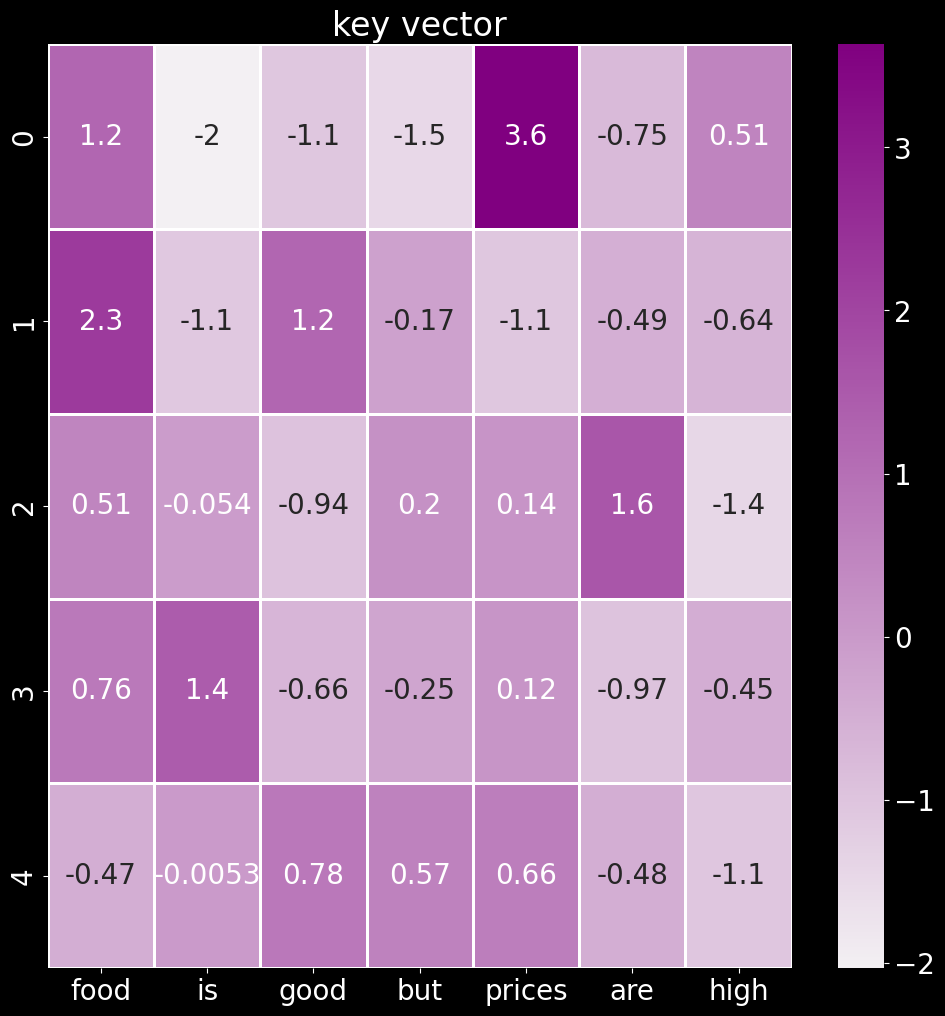

In [ ]:
text = 'food is good, but prices are high.'
text = text.translate(text.maketrans('' , '' , string.punctuation))

words = text.split()

# 1. create key

pca = PCA(n_components= 5)
tokens = [glove[word].tolist() for word in words]
key = pca.fit_transform(tokens)

kdf = pd.DataFrame(np.matrix(key).transpose() , columns = words)
sns.heatmap(kdf , annot = True ,  cmap = sns.light_palette('purple' , as_cmap = True) , linewidths = 1).set_title('key vector')
plt.show()

In [6]:
value = key
vdf = pd.DataFrame(value.T , columns = words)
vdf

,food,is,good,but,prices,are,high
0,1.198695,-2.034884,-1.077090,-1.481084,3.632923,-0.752410,0.513852
1,2.255404,-1.100909,1.224496,-0.170320,-1.079529,-0.493519,-0.635622
2,0.505580,-0.054347,-0.938212,0.204491,0.138739,1.581181,-1.437432
3,0.763951,1.443557,-0.660844,-0.249058,0.121044,-0.971596,-0.447054
4,-0.467900,-0.005251,0.778766,0.569702,0.664370,-0.481991,-1.057695


(1, 25)


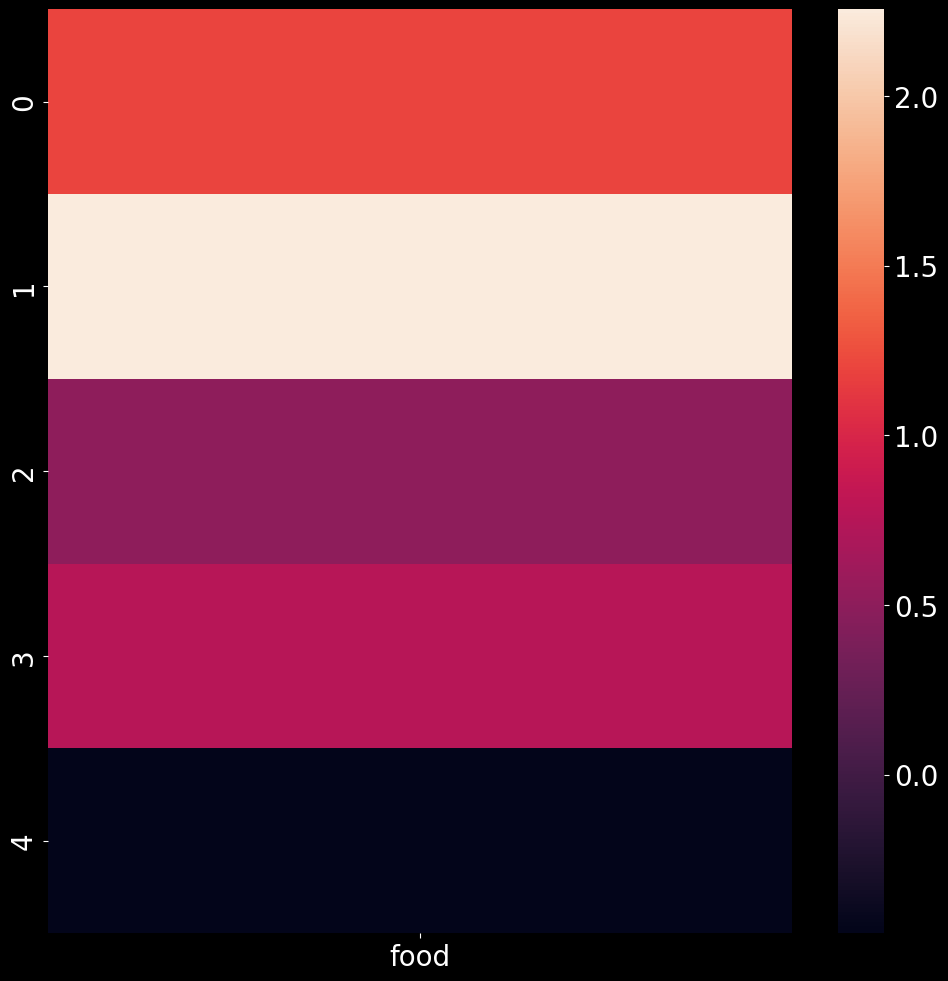

In [64]:
qtext = 'food'
query = glove[qtext].reshape(1 , -1)
print(f"{query.shape}")
query = pca.transform(query)
qdf = pd.DataFrame(query.T , columns = [qtext])
sns.heatmap(qdf)
plt.show()

In [65]:
key.shape , query.shape

((7, 5), (1, 5))

In [66]:
attention_score = query @ key.T
print(f"Attention score: {attention_score}")

activated_attention_score = tf.nn.softmax(attention_score)
print(f"Activated Attention Score: {activated_attention_score}")
activated_attention_score.shape , value.shape

Attention score: [[ 7.58187898 -3.84441277  0.12705183 -2.51295444  1.7717493  -1.73231069
  -1.39100222]]
Activated Attention Score: [[9.96169907e-01 1.08632046e-05 5.76425418e-04 4.11341918e-05
  2.98556242e-03 8.97908823e-05 1.26316658e-04]]


(TensorShape([1, 7]), (7, 5))

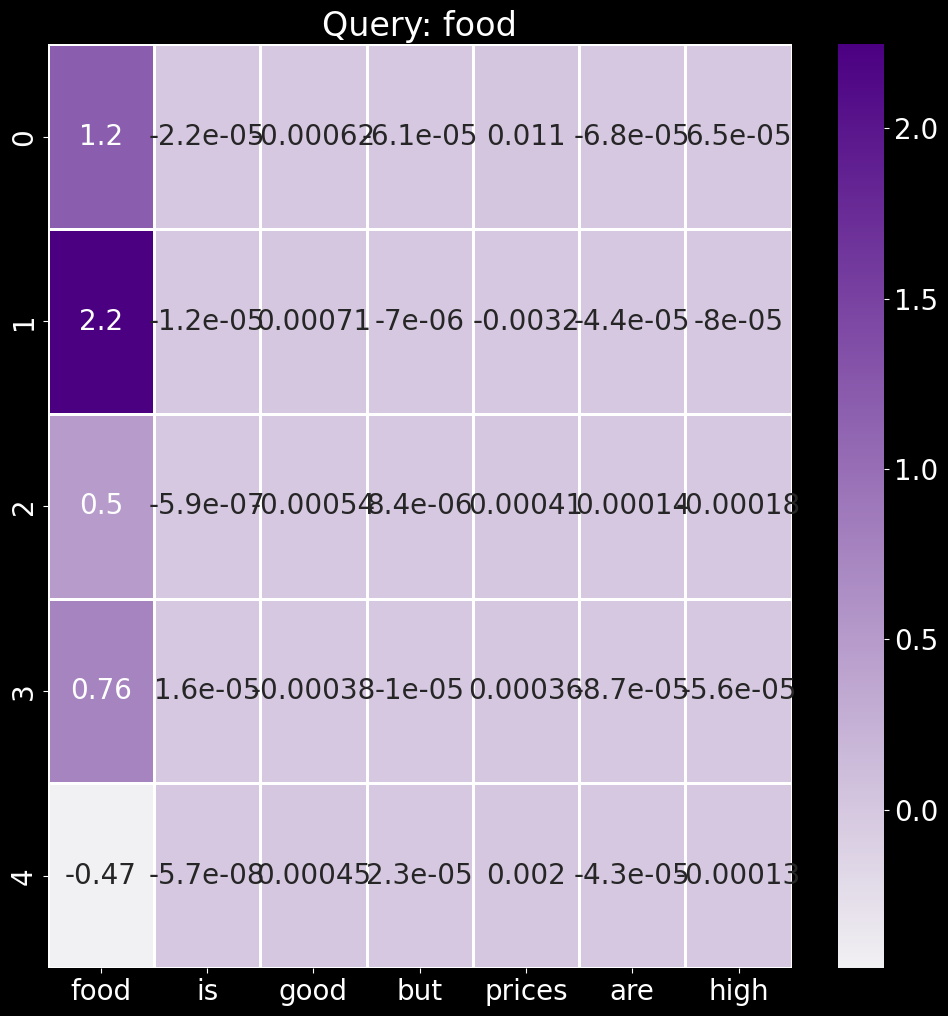

In [67]:
def finalAttention(aweights , value):
    return [value.T[: , i] * aweights[0 , i] for i in range(activated_attention_score.shape[1])]

fattention = finalAttention(activated_attention_score , value)
fdf = pd.DataFrame(np.array(fattention).T , columns = words)
fdf.head()
sns.heatmap(fdf , annot = True , cmap = sns.light_palette('indigo' , as_cmap = True) , linewidths= 1).set_title(f'Query: {qtext}')
plt.show()

In [28]:
value.T[: , 0].shape , activated_attention_score[0 , 0]

((5,), 0.9962)